In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('test.csv',delimiter = ',')
dataset1 = pd.read_csv('test_1.csv',delimiter = ',') # this one does not take care the CRAN before GH date

In [3]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(138361, 22)

In [4]:
X_1 = (dataset1.drop('class', axis=1)).drop('id', axis=1)
y_1 = dataset1['class']
dataset1.shape

(138361, 22)

In [5]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=20190101)
X_tr_1, X_test_1, y_tr_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=20190101)

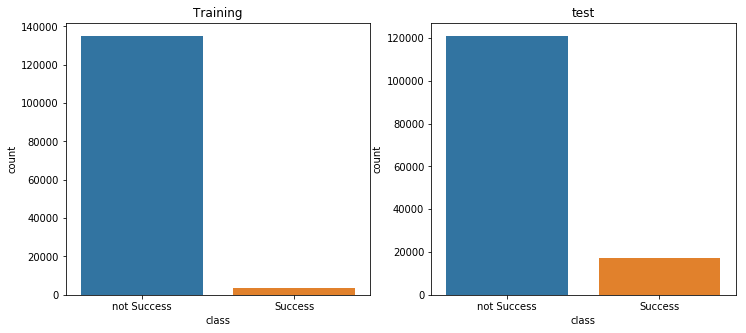

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Training')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('test')
plt.show()

In [7]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.97505
Precision on train: 0.28996
Recall on train: 0.03387

Classification accuracy of the LogisticRegression classifier on test set: 0.97451
Precision on test: 0.24031
Recall on test: 0.03128


array([[40420,    98],
       [  960,    31]])

In [8]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

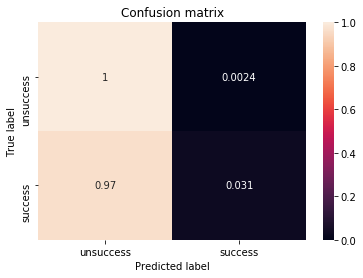

In [9]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [10]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.89225
Precision on train: 0.75317
Recall on train: 0.20583

Classification accuracy of the LogisticRegression classifier on test set: 0.89207
Precision on test: 0.74319
Recall on test: 0.21005


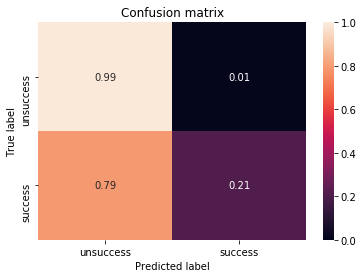

In [11]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [12]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)

ss1 = StandardScaler()
ss1.fit(X_tr_1)
X_tr_1 = ss.transform(X_tr_1)
X_test_1 = ss.transform(X_test_1)

In [13]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.97559
Precision on train: 0.35266
Recall on train: 0.03170

Classification accuracy of the LogisticRegression classifier on test set: 0.97511
Precision on test: 0.29000
Recall on test: 0.02926


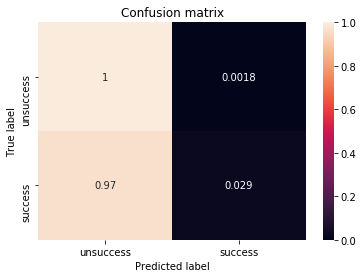

In [14]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [15]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.89278
Precision on train: 0.75899
Recall on train: 0.20905

Classification accuracy of the LogisticRegression classifier on test set: 0.89152
Precision on test: 0.73297
Recall on test: 0.20928


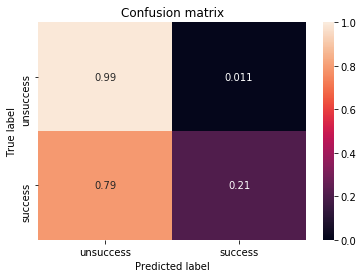

In [16]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9893239169041425
Precision on train: 0.99148
Recall on train: 0.55580

Accuracy score on the test dataset: 0.97610
Precision on test: 0.49751
Recall on test: 0.10091


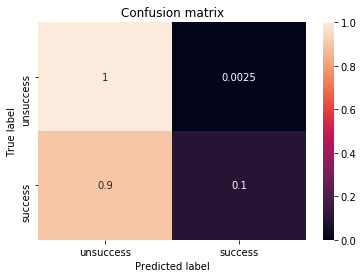

In [18]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [19]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. normalized_proj_span
3. proj_span
4. num_Push
5. num_Create
6. num_PullRequest
7. first_quater_teamsize
8. final_teamsize
9. num_Issues
10. num_Fork


In [20]:
# dataset_1
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr_1, y_tr_1)
y_pred = rf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
accuracy_score_train = rf.score(X_tr_1, y_tr_1)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
accuracy_score_test = rf.score(X_test_1, y_test_1)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9403935902201297
Precision on train: 0.96399
Recall on train: 0.54368

Accuracy score on the test dataset: 0.91226
Precision on test: 0.81829
Recall on test: 0.38410


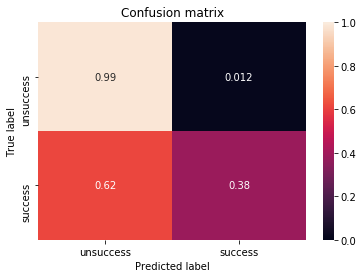

In [21]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [22]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. num_Create
2. activity_intensity
3. num_Push
4. normalized_proj_span
5. proj_span
6. num_Delete
7. num_PullRequest
8. first_quater_teamsize
9. final_teamsize
10. num_Fork


In [24]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test, y_test)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.97785
Radial Basis Function SVC classification accuracy on test set: 0.97608


In [27]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Precision on train: 0.98765
Recall on train: 0.06947
Precision on test: 0.33333
Recall on test: 0.00202


In [28]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_1, y_tr_1)
ca = svc_rbf.score(X_tr_1, y_tr_1)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test_1, y_test_1)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.90019
Radial Basis Function SVC classification accuracy on test set: 0.89730


In [29]:
y_pred = svc_rbf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Precision on train: 0.91343
Recall on train: 0.22300
Precision on test: 0.89283
Recall on test: 0.20370
